In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])
df_target.head(3)

,target
0,151.0
1,75.0
2,141.0


In [6]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi']]
y = df_target

# Separar los datos en muestras de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Construir modelo de regresión lineal
modelo_regresion_simple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_simple.fit(X_train, y_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y_pred = modelo_regresion_simple.predict(X_test)

In [8]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadrático medio (MSE): 4150.68
r2: 0.19


In [9]:
print('pendiente:', modelo_regresion_simple.coef_)
print('intercepto:', modelo_regresion_simple.intercept_)

pendiente: [[981.65543614]]
intercepto: [152.28824927]


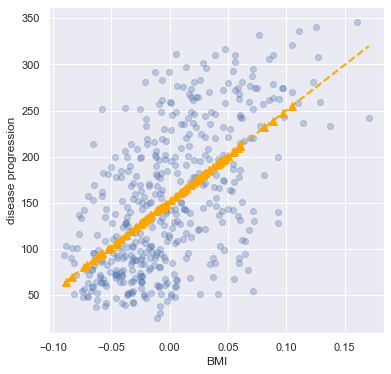

In [10]:
m = modelo_regresion_simple.coef_
b = modelo_regresion_simple.intercept_
z = np.linspace(X.min(), X.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression');

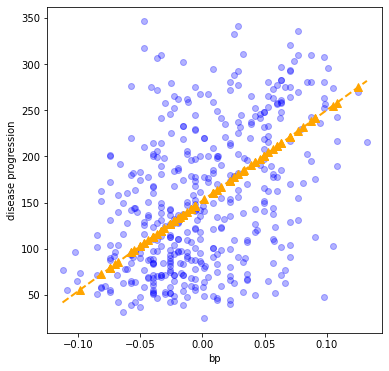

In [10]:
# Definir nuestras variables dependiente e independiente(s)
X2 = df[['bp']]
y2 = df_target

# Separar los datos en muestras de entrenamiento y de prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# Construir modelo de regresión lineal
modelo_regresion_simple2 = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_simple2.fit(X2_train, y2_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y2_pred = modelo_regresion_simple.predict(X2_test)

m2 = modelo_regresion_simple2.coef_
b2 = modelo_regresion_simple2.intercept_
z2 = np.linspace(X2.min(), X2.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X2.values, y2.values, 'ob', alpha=0.3)
ax.plot(z2, m*z2 + b2, ls='--', color='orange', lw=2)
plt.plot(X2_test.values, y2_pred, '^', color='orange', ms=8)
ax.set_xlabel('bp')
ax.set_ylabel('disease progression');

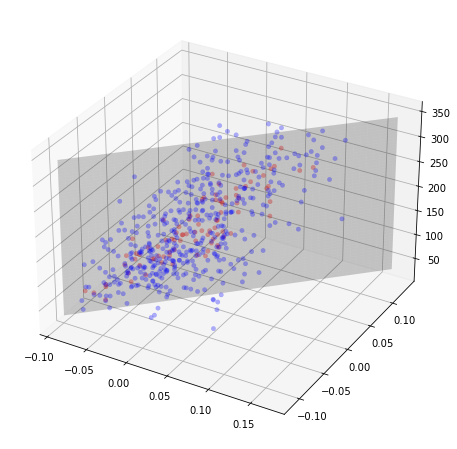

In [49]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

X3 = df[['bmi','bp']]

# Separar los datos en muestras de entrenamiento y de prueba
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=0)

# Construir modelo de regresión lineal
modelo_regresion_bivariable = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_bivariable.fit(X3_train, y3_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y3_pred = modelo_regresion_bivariable.predict(X3_test)


x_1 = np.linspace(X3['bmi'].min(),X3['bmi'].max(),100)
x_2 = np.linspace(X3['bp'].min(),X3['bp'].max(),100)
a = modelo_regresion_bivariable.coef_
plano = a[0][0]*x_1 + a[0][1]*x_2 + modelo_regresion_bivariable.intercept_
plano = np.array([plano]).reshape(100,1)
#plano = plano.reshape(100,1)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X3['bmi'],X3['bp'], y, linewidth=0.2, color='blue', alpha=0.3)
ax.plot_surface(x_1,x_2,plano, color='black',alpha=0.2)
ax.scatter(X3_test['bmi'],X3_test['bp'], y3_pred, linewidth=0.2, color='red', alpha=0.3)
#ax.plot_surface(plano)


In [48]:
X3_test['bmi']

362    0.104809
249    0.060618
271    0.008883
435   -0.023451
400    0.045529
         ...   
381   -0.089197
213   -0.070875
134    0.043373
49     0.014272
52    -0.009439
Name: bmi, Length: 89, dtype: float64

C:\Users\yael_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


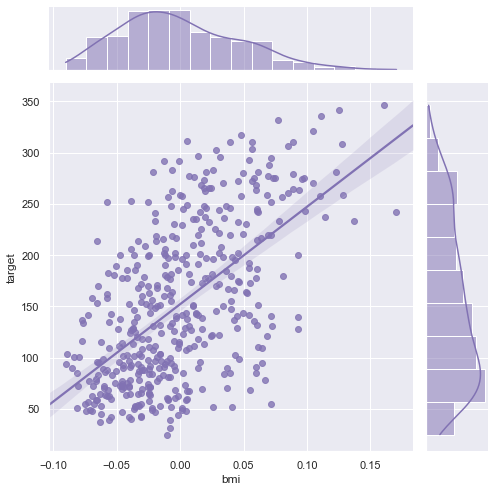

In [18]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(X['bmi'], y['target'],kind="reg", truncate=False,color="m", height=7)

442